# Свернуть описание

## Домашняя работа 5. 

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат домашней работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## Данные


В этой домашней работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC. Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

# Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

##Данные и их подготовка

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
import pandas as pd
import numpy as np
random_state= 3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Машинное обучение 1/data.adult.csv')
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [4]:
df.replace('?', np.nan, inplace = True)
df[df.isnull().sum(axis = 1) >0].shape

(933, 14)

In [5]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(16280, 14)


(15347, 14)

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [6]:
y = df['>50K,<=50K'].replace('<=50K', -1).replace('>50K', 1)
df.drop(columns='>50K,<=50K', inplace=True)
y.value_counts()

-1    11407
 1     3940
Name: >50K,<=50K, dtype: int64

In [7]:
X = df[['age','fnlwgt','education-num','capital-gain','capital-gain','hours-per-week']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15347 entries, 0 to 16279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15347 non-null  int64
 1   fnlwgt          15347 non-null  int64
 2   education-num   15347 non-null  int64
 3   capital-gain    15347 non-null  int64
 4   capital-gain    15347 non-null  int64
 5   hours-per-week  15347 non-null  int64
dtypes: int64(6)
memory usage: 839.3 KB


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

In [8]:
!pip install -U scikit-learn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [9]:
#функция для нахождения лучшего параметра
def best_parameter(model, hyperparameter_name,hyperparameter_range , X, y):
  param = {hyperparameter_name:hyperparameter_range}
  clf = model
  kf = KFold(n_splits=5)
  mysplit = kf.split(X)
  search = GridSearchCV(clf, param, cv=mysplit, scoring='roc_auc')
  search.fit(X,y)
  if type(hyperparameter_range[0]) == str:
    plt.plot(hyperparameter_range,search.cv_results_['mean_test_score'])
    plt.ylabel('ROC-AUC')
    plt.xlabel(hyperparameter_name)
    plt.title('{}'.format(str(model).split('(')[0]))
    plt.xticks(rotation=90) 
    plt.fill_between(hyperparameter_range, search.cv_results_['mean_test_score'] + search.cv_results_['std_test_score'],
                 search.cv_results_['mean_test_score'] - search.cv_results_['std_test_score'], alpha =0.4)
  else:
    plt.plot(hyperparameter_range,search.cv_results_['mean_test_score'])
    plt.ylabel('ROC-AUC')
    plt.xlabel(hyperparameter_name)
    plt.title('{}'.format(str(model).split('(')[0])) 
    plt.fill_between(hyperparameter_range, search.cv_results_['mean_test_score'] + search.cv_results_['std_test_score'],
                 search.cv_results_['mean_test_score'] - search.cv_results_['std_test_score'], alpha =0.4)
  plt.show()
  print("Best {} = {}".format(hyperparameter_name,search.best_params_.get(hyperparameter_name)))
  print('Best AUC: {}'.format(max(search.cv_results_['mean_test_score'])))

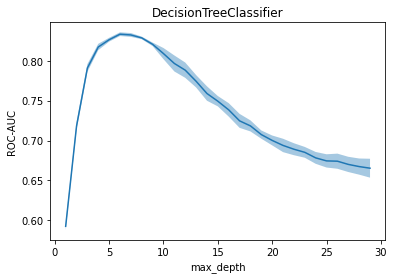

Best max_depth = 6
Best AUC: 0.8332965053533193
CPU times: user 5.89 s, sys: 15.4 ms, total: 5.91 s
Wall time: 5.91 s


In [10]:
%%time
best_parameter(DecisionTreeClassifier(random_state = random_state),'max_depth',list(np.arange(1,30,1)),X,y)

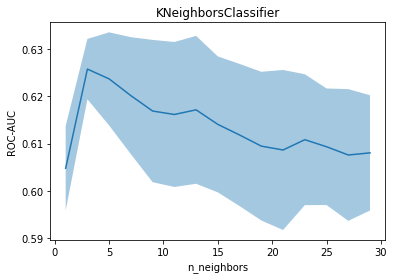

Best n_neighbors = 3
Best AUC: 0.6257424160994252
CPU times: user 4.89 s, sys: 25 ms, total: 4.92 s
Wall time: 4.93 s


In [11]:
%%time
best_parameter(KNeighborsClassifier(),'n_neighbors',list(np.arange(1,30,2)),X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

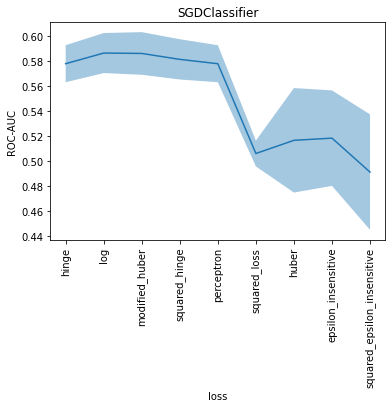

Best loss = log
Best AUC: 0.5861169412094288
CPU times: user 17.3 s, sys: 4.37 s, total: 21.6 s
Wall time: 16.5 s


In [12]:
%%time
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 
        'perceptron','squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
best_parameter(SGDClassifier(random_state = random_state),'loss',loss,X,y)

Что вы можете сказать о получившихся графиках?

Для решающих деревьев и лижайших соседей с увеличением значения гиперпараметра(max_depth и n_neighbors соответственно) сначала качество возрастает, а потом падает. В SGD модели функции потерь 'perceptron','squared_loss', 'huber', 'epsilon_insensitive' и 'squared_epsilon_insensitive' показывают крайне плохое качество.

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

In [13]:
from IPython.display import clear_output

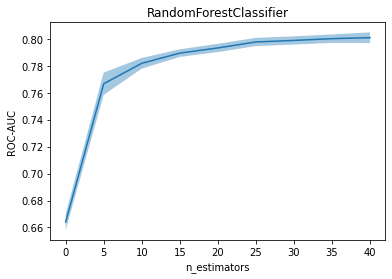

ROC-AUC: 0.800948031845494
Stabilized!
n_estimators: 41
CPU times: user 15.2 s, sys: 83.5 ms, total: 15.3 s
Wall time: 15.3 s


In [14]:
%%time
roc_auc = []
std = []
for i in np.arange(1,100,5):
  kf = KFold(n_splits=5)
  mysplit = kf.split(X)
  #forest.append((str(i),model.estimators_[i]))
  model = RandomForestClassifier(n_estimators=i, random_state = random_state)
  cross_val = cross_val_score(model, X, y, cv=mysplit, scoring = 'roc_auc')
  roc_auc.append(np.mean(cross_val))
  std.append(np.std(cross_val))
  plt.plot(np.arange(0,i+1,5),np.array(roc_auc))
  plt.ylabel('ROC-AUC')
  plt.xlabel('n_estimators')
  plt.title('{}'.format(str(model).split('(')[0]))
  plt.fill_between(np.arange(0,i+1,5), np.array(roc_auc) + np.array(std), np.array(roc_auc) - np.array(std), alpha = 0.4)
  plt.show()
  print('ROC-AUC:',np.mean(cross_val))
  if len(np.array(roc_auc))> 1:
    if np.array(roc_auc)[-1] - np.array(roc_auc)[-2] < 0.1**3 :
      print('Stabilized!')
      print('n_estimators:', i)
      break
  clear_output(wait=True)

##Гистограммы
При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

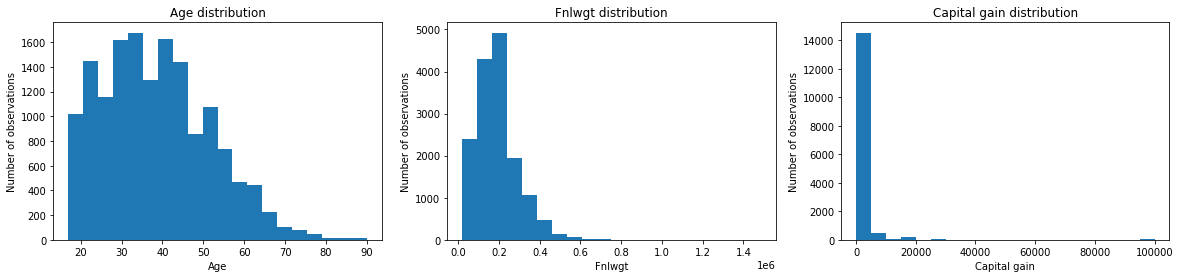

In [15]:
fig, ax = plt.subplots(ncols =3, figsize = (20,4))
ax[0].hist(df['age'], 20)
ax[0].set_title('Age distribution')
ax[0].set_ylabel('Number of observations')
ax[0].set_xlabel('Age')
ax[1].hist(df['fnlwgt'],20)
ax[1].set_title('Fnlwgt distribution')
ax[1].set_ylabel('Number of observations')
ax[1].set_xlabel('Fnlwgt')
ax[2].hist(df['capital-gain'],20)
ax[2].set_title('Capital gain distribution')
ax[2].set_ylabel('Number of observations')
ax[2].set_xlabel('Capital gain')
plt.show()

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Особенность данных заключается в том, что масштаб признаков очень различен, в тысячи раз, поэтому такие данные могут сильно ухудшить качество работы некоторых алгоритмов, которые сильно опираются на масштаб признаков. Среди наших алгоритмов это особенно влияет на метод ближайших соседей, качество которого напрямую зависит от масштабирования признаков, поскольку в отсутствии масштабирования алгоритм будет больше всего опираться на признаки с наибольшим абсолютным значением, а нам нужно учесть все признаки в равной мере. SGDClassifier, в основе которого лежат линейные модели классификации, также будет показывать плохие результаты на немасштабированных признаках. Для решающих деревьев и случайного леса проблема масштабирования неактульна. Таким образом, масштабирование позволит улучшить нам качество на двух моделях: KNN и линейных моделях.

##Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1.shape

(15347, 6)

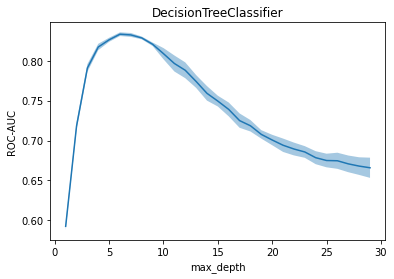

Best max_depth = 6
Best AUC: 0.8332965053533193
CPU times: user 5.41 s, sys: 11 ms, total: 5.42 s
Wall time: 5.42 s


In [17]:
%%time
best_parameter(DecisionTreeClassifier(random_state = random_state),'max_depth',list(np.arange(1,30,1)),X1,y)

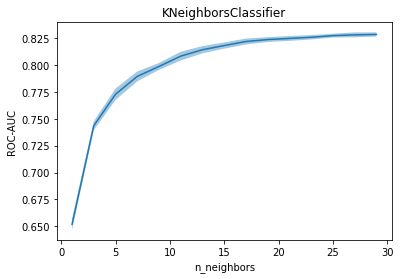

Best n_neighbors = 29
Best AUC: 0.8285298871984642
CPU times: user 14.9 s, sys: 16.1 ms, total: 14.9 s
Wall time: 14.9 s


In [18]:
%%time
best_parameter(KNeighborsClassifier(),'n_neighbors',list(np.arange(1,30,2)),X1,y)

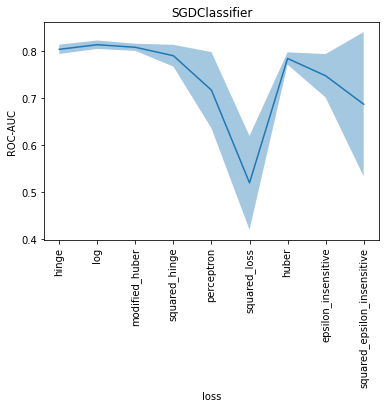

Best loss = log
Best AUC: 0.8138374909117866
CPU times: user 3.03 s, sys: 2.05 s, total: 5.08 s
Wall time: 2.67 s


In [19]:
%%time
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 
        'perceptron','squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
best_parameter(SGDClassifier(random_state = random_state),'loss',loss,X1,y)

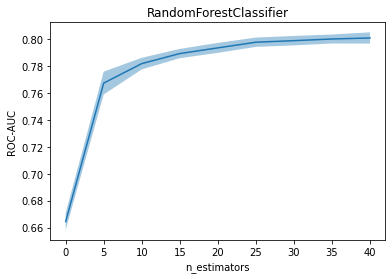

ROC-AUC: 0.8009685040733443
Stabilized!
n_estimators: 41
CPU times: user 18.1 s, sys: 93.4 ms, total: 18.2 s
Wall time: 18.5 s


In [20]:
%%time
roc_auc = []
std = []
for i in np.arange(1,100,5):
  kf = KFold(n_splits=5)
  mysplit = kf.split(X1)
  #forest.append((str(i),model.estimators_[i]))
  model = RandomForestClassifier(n_estimators=i, random_state = random_state)
  cross_val = cross_val_score(model, X1, y, cv=mysplit, scoring = 'roc_auc')
  roc_auc.append(np.mean(cross_val))
  std.append(np.std(cross_val))
  plt.plot(np.arange(0,i+1,5),np.array(roc_auc))
  plt.ylabel('ROC-AUC')
  plt.xlabel('n_estimators')
  plt.title('{}'.format(str(model).split('(')[0]))
  plt.fill_between(np.arange(0,i+1,5), np.array(roc_auc) + np.array(std), np.array(roc_auc) - np.array(std), alpha = 0.4)
  plt.show()
  print('ROC-AUC:',np.mean(cross_val))
  if len(np.array(roc_auc))> 1:
    if np.array(roc_auc)[-1] - np.array(roc_auc)[-2] < 0.1**3 :
      print('Stabilized!')
      print('n_estimators:', i)
      break
  clear_output(wait=True)

Изменилось ли качество у некоторых алгоритмов?

Качество действительно изменилось для метода ближайших соседей, где масштабирование крайне важно, также качество увеличилось для большинства функций потерь в SGD классификаторе, однако оно все еще крайне плохое для некоторых функци потерь, например, для квадратичной 

##Перебор нескольких гиперпарметров

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [46]:
def best_parameters(model, hyperparameter_names, hyperparameter_range , X, y):
  param = dict()
  for i in range(len(hyperparameter_names)):
    param[hyperparameter_names[i]] = hyperparameter_range[i]
  clf = model
  kf = KFold(n_splits=5)
  mysplit = kf.split(X)
  search = GridSearchCV(clf, param, cv=mysplit, scoring='roc_auc')
  search.fit(X,y)
  plt.show()
  print("Best {} = {}".format(hyperparameter_names[0],search.best_params_.get(hyperparameter_names[0])))
  if len(hyperparameter_names) >1 :
    print("Best {} = {}".format(hyperparameter_names[1],search.best_params_.get(hyperparameter_names[1])))
  print('Best AUC: {}'.format(max(search.cv_results_['mean_test_score'])))

In [22]:
%%time
hyperparameter_range = [list(np.arange(1,34,4)),[ 'chebyshev', 'manhattan','euclidean' ]]
hyperparameter_names = ['n_neighbors', 'metric']
best_parameters(KNeighborsClassifier(),hyperparameter_names,hyperparameter_range,X1,y)

Best n_neighbors = 33
Best metric = manhattan
Best AUC: 0.8302641567797625
CPU times: user 28.3 s, sys: 18.7 ms, total: 28.4 s
Wall time: 28.4 s


In [23]:
%%time
hyperparameter_range = [list(np.arange(1,30,1)),[ 'gini', 'entropy']]
hyperparameter_names = ['max_depth', 'criterion']
best_parameters(DecisionTreeClassifier(),hyperparameter_names,hyperparameter_range,X1,y)

Best max_depth = 6
Best criterion = gini
Best AUC: 0.8333764529228466
CPU times: user 12.6 s, sys: 21.3 ms, total: 12.6 s
Wall time: 12.6 s


In [24]:
%%time
hyperparameter_range = [['hinge', 'log', 'modified_huber', 'squared_hinge', 
                         'perceptron','squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        [ 'l2', 'l1', 'elasticnet']]
hyperparameter_names = ['loss', 'penalty']
best_parameters(SGDClassifier(), hyperparameter_names, hyperparameter_range,X1,y)

Best loss = log
Best penalty = l2
Best AUC: 0.8161832069750563
CPU times: user 10.6 s, sys: 7.52 s, total: 18.2 s
Wall time: 9.28 s


In [47]:
%%time
max_features = [['auto', 'sqrt', 'log2', None]]
hyperparameter_names = ['max_features']
best_parameters(RandomForestClassifier(n_estimators=41, random_state = random_state),hyperparameter_names,max_features,X1,y)

Best max_features = auto
Best AUC: 0.8009685040733443
CPU times: user 15.5 s, sys: 28.2 ms, total: 15.5 s
Wall time: 15.5 s


Какой из алгоритмов имеет наилучшее качество?

Лучшее качество у DecisionTreeClassifier

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

Сравнение алгоритмов с точки зрения скорости обучения здесь не совсем уместо, потому что количество перебираемых параметров в моделях различается, однако можно сказать, что для SGD классификатора скорость обучения выше, чем для других моделей, так как изменение гиперпараметров не подразумевает принципиального усложнения модели, поскольку мы просто обучаем новую модель. В то же время в случае kNN и Decision Tree мы каждый раз увеличиваем сложность модели (при увеличении количества ближайших соседей - нужно считать больше расстояний до соседей, при увеличении глубины деревьев сложность также растет за счет увеличения листьев). В данном случае дольше всего работает обучение kNN модели, поскольку мы перебираем больше всего гиперпараметров. Однако если бы мы взяли готовые модели с заранее заданными гиперпараметрами, которые нужно обучить, то, скорее всего, дольше всего обучался бы случайный лес, поскольку там для обучения модели фактически необходимо обучить множество деревьев, модель будет ансамблем. Однако опять-таки зависит от заданных гиперпарметров( если задать огромное количество ближайших соседей в kNN обучение тоже будет крайне долгим)


## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [26]:
X_obj = pd.get_dummies(df[df.columns[(df.dtypes == "object").values]])
X_obj.shape

(15347, 57)

Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [27]:
X_all = np.concatenate((X1, np.array(X_obj)), axis=1)

In [28]:
%%time
model = KNeighborsClassifier(n_neighbors=33, metric = 'manhattan')
kf = KFold(n_splits=5)
mysplit = kf.split(X_all)
cross_val = cross_val_score(model, X_all, y, cv=mysplit, scoring = 'roc_auc')
print('ROC-AUC:',np.mean(cross_val))

ROC-AUC: 0.890785518084271
CPU times: user 22.6 s, sys: 12.2 ms, total: 22.6 s
Wall time: 22.6 s


In [29]:
%%time
model = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state = random_state)
kf = KFold(n_splits=5)
mysplit = kf.split(X_all)
cross_val1 = cross_val_score(model, X_all, y, cv=mysplit, scoring = 'roc_auc')
print('ROC-AUC:',np.mean(cross_val1))

ROC-AUC: 0.8873757981340145
CPU times: user 305 ms, sys: 970 µs, total: 306 ms
Wall time: 307 ms


In [30]:
%%time
model = SGDClassifier(loss = 'log', penalty ='l2', random_state = random_state)
kf = KFold(n_splits=5)
mysplit = kf.split(X_all)
cross_val2 = cross_val_score(model, X_all, y, cv=mysplit, scoring = 'roc_auc')
print('ROC-AUC:',np.mean(cross_val2))

ROC-AUC: 0.8986026938519884
CPU times: user 990 ms, sys: 372 ms, total: 1.36 s
Wall time: 918 ms


In [39]:
%%time
model = RandomForestClassifier(n_estimators=41, max_features= 'auto', random_state = random_state)
kf = KFold(n_splits=5)
mysplit = kf.split(X_all)
cross_val3 = cross_val_score(model, X_all, y, cv=mysplit, scoring = 'roc_auc')
print('ROC-AUC:',np.mean(cross_val3))

ROC-AUC: 0.8907884437690635
CPU times: user 3.21 s, sys: 6.93 ms, total: 3.22 s
Wall time: 3.22 s


Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Да, лучшее качество теперь у SGDClassifier

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [48]:
#не будем брать kNN, так как она слишком долго работает(при этом качество в ансамбле не самое лучшее из возможных)
clf1 = RandomForestClassifier(n_estimators=41, max_features= 'auto', random_state = random_state)
clf2 = SGDClassifier(loss = 'log', penalty ='l2', random_state = random_state)
kf = KFold(n_splits=5)
mysplit = kf.split(X_all)
model = VotingClassifier(estimators=[('KNN', clf1), ('SGD', clf2)], voting='soft')

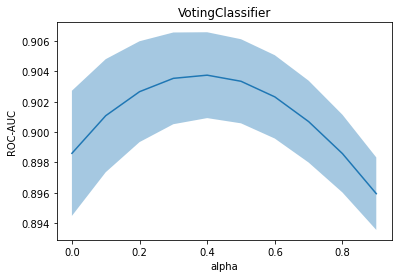

Best alpha = [0.4, 0.6]
Best AUC: 0.9037519735047453
CPU times: user 42.3 s, sys: 4.85 s, total: 47.2 s
Wall time: 41.5 s


In [49]:
%%time
param = {'weights':[[i, 1-i] for i in np.arange(0,1,0.1)]}
search = GridSearchCV(model, param, cv=mysplit, scoring='roc_auc')
search.fit(X_all,y)
plt.plot(np.arange(0,1,0.1), search.cv_results_['mean_test_score'])
plt.ylabel('ROC-AUC')
plt.xlabel('alpha')
plt.title('{}'.format(str(model).split('(')[0])) 
plt.fill_between(np.arange(0,1,0.1), search.cv_results_['mean_test_score'] + search.cv_results_['std_test_score'],
                 search.cv_results_['mean_test_score'] - search.cv_results_['std_test_score'], alpha =0.4)
plt.show()
print("Best alpha = {}".format(search.best_params_.get('weights')))
print('Best AUC: {}'.format(max(search.cv_results_['mean_test_score'])))

In [50]:
model = VotingClassifier(estimators=[('KNN', clf1), ('SGD', clf2)], voting='soft', weights = [0.4,0.6])
kf = KFold(n_splits=5)
mysplit = kf.split(X_all)
cross_val4 = cross_val_score(model, X_all, y, cv=mysplit, scoring = 'roc_auc')
print('ROC-AUC:',np.mean(cross_val4))

ROC-AUC: 0.9037519735047453


Действительно получили прирост по качеству. ROC-AUC впервые больше 0.9!

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

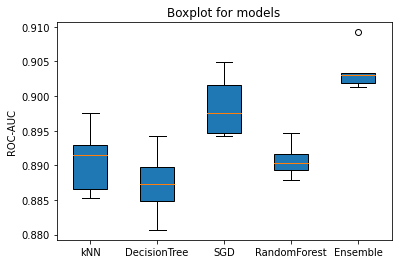

In [51]:
plt.boxplot([cross_val, cross_val1, cross_val2, cross_val3, cross_val4], labels = ['kNN', 'DecisionTree', 'SGD', 'RandomForest', 'Ensemble' ],patch_artist=True)
plt.ylabel('ROC-AUC')
plt.title('Boxplot for models') 
plt.show()

**Итоги**: 

1.   *Decision Tree* - несложная, а самое главное быстро работающая модель, для которой масштабирование признаков не нужно, однако очень важно подобрать верную глубину дерева, при которой достигается максимальное качество на кросс-валидации, так как и при слишком маленькой, и при слишком большой глубине качество будет значительно хуже. На наших данных показала самый слабый результат, однако отставание в качестве не такое большое
2.   *kNN* - очень высокая зависимость модели от масштабирования признаков, при немасштабированных признаках показывает низкое качество с огромным разбросом на кросс-валидации. После масштабирования большинство проблем решается и качество стабилизируется (будет незначительное ухудшение при очень большом числе соседей),  однако очень медленно работает при увеличении числа ближайших соседей. Таким образом, число соседей будет важным гиперпармаетром, в то время как метрика измерения расстояния до ближайшего соседа не так приципиальна. На наших данных была не лучшей, но и не худшей моделью. 

3. *Random Forest* - берет за основу нескоторое количество деревьев, с увеличением числа которых повышается качество, но также растет и вычислительная сложность, поэтому рационально выбирать число деревьев, при котором качество стабилизировалось. Выбор между max_features почти не важен, очень слабо влияет на качество. В целом, превосходит обычное решающее дерево, но в данной задаче не является самой лучшей моделью

4. *SGD* - за этой моделью кроется целый класс линейных моделей, который оптимизируются с помощью метода градиентного спуска. Здесь выбор гиперпараметра крайне важен, поскольку мы получаем абсолютно разные модели в зависимости от выбора функции потерь. Здесь лучшее качество удалось получить с помощью лог-лосса с l2-регуляризацией. Модель показала самый хороший результат среди простых моделей, однако уступила ансамблю.

5. *SGD + Random Forest* - абсолютный победитель с ROC-AUC > 0.9, ансамблевая модель на основе VotingClassifier. Подбор гиперпараметра весов в этой модели - принципиально важная задача, поскольку иначе можно получить качество даже хуже, чем при использовании одной из этих моделей отдельно. 
